# NYC Yellow Taxi

## Paso 0: Problema de negocio

### Paso 0.1 Contexto

### Paso 0.2: Problema

### Paso 0.3: Objetivos

## Paso 1: Importar Liberias

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import shutil
import os


from utils.cleaning_data import remove_outliers
from sklearn.impute import KNNImputer

## Paso 2: Cargar los datos

In [49]:
# Define the target directory and the expected dataset files
target_dir = os.path.abspath(os.path.join(os.getcwd(), "../data"))
expected_files = ["yellow_tripdata_2015-01.csv", "yellow_tripdata_2016-01.csv", "yellow_tripdata_2016-02.csv", "yellow_tripdata_2016-03.csv"]  # Replace with actual dataset filenames

# Check if the files already exist in the target directory
if all(os.path.exists(os.path.join(target_dir, file)) for file in expected_files):
    print("Files already exist in the target directory. Skipping download.")
else:
    # Download the dataset
    path = kagglehub.dataset_download("elemento/nyc-yellow-taxi-trip-data")
    print("Path to dataset files:", path)

    # Create the 'data' folder if it doesn't exist
    os.makedirs(target_dir, exist_ok=True)

    # Move all files from download path to target_dir, checking if the file already exists
    for file_name in os.listdir(path):
        src = os.path.join(path, file_name)
        dst = os.path.join(target_dir, file_name)

        # Check if the file already exists in the target directory
        if not os.path.exists(dst):
            shutil.move(src, dst)
            print(f"Moved: {file_name}")
        else:
            print(f"File already exists: {file_name}")

print("Files moved to:", target_dir)

Files already exist in the target directory. Skipping download.
Files moved to: C:\Users\guill\Documents\GitHub\nyc-yellow-taxi\data


In [50]:
df = pd.read_csv(f"../data/yellow_tripdata_2016-03.csv")

In [51]:
df.shape

(12210952, 19)

In [52]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [53]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12210947,1,2016-03-31 16:34:36,2016-03-31 16:34:36,1,0.0,0.000000,0.000000,1,Y,0.000000,0.000000,2,19.0,1.0,0.5,0.0,0.00,0.3,20.80
12210948,1,2016-03-26 03:02:32,2016-06-14 18:47:55,1,0.4,-73.977356,40.774471,1,N,-73.982536,40.772408,1,4.0,1.0,0.5,1.7,0.00,0.3,7.50
12210949,1,2016-03-20 08:43:59,2016-06-27 15:05:01,1,20.2,0.000000,0.000000,2,N,-74.008614,40.710987,1,52.0,0.0,0.5,6.0,5.54,0.3,64.34
12210950,1,2016-03-20 08:49:47,2016-06-28 19:11:27,1,15.4,-73.790077,40.647377,1,N,-73.971756,40.578457,1,42.5,1.0,0.5,5.0,0.00,0.3,49.30
12210951,1,2016-03-20 08:50:24,2016-06-29 15:58:16,1,17.5,-73.798485,40.645096,2,N,-73.993111,40.725880,1,52.0,0.0,0.5,13.2,0.00,0.3,66.00


## Paso 3: Análisis de datos

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [55]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [56]:
# Select specific numerical columns
selected_columns = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tip_amount', 'total_amount']
numerical_columns = [col for col in selected_columns if col in df.columns]

# Compute summary statistics
statistics = df[numerical_columns].agg(
    ['mean', 'median', 'std', 'var', 'min', 'max', 'skew', 'kurt']
).T.rename(columns={
    "mean": "Mean",
    "median": "Median",
    "std": "Standard Deviation",
    "var": "Variance",
    "min": "Minimum",
    "max": "Maximum",
    "skew": "Skewness",
    "kurt": "Kurtosis"
})

# Display results
print("\nMedidas de tendencia central y dispersión:\n")
statistics


Medidas de tendencia central y dispersión:



,Mean,Median,Standard Deviation,Variance,Minimum,Maximum,Skewness,Kurtosis
passenger_count,1.659580,1.00,1.312189,1.721841e+00,0.0,9.00,2.139831,3.483240e+00
trip_distance,6.131770,1.70,6156.482645,3.790228e+07,0.0,19072628.80,2683.600876,7.853886e+06
fare_amount,12.795078,9.50,134.097923,1.798225e+04,-376.0,429496.72,2838.928250,8.760766e+06
extra,0.345560,0.00,0.456307,2.082160e-01,-58.5,80.00,4.084671,2.164568e+02
mta_tax,0.497636,0.50,0.048633,2.365187e-03,-1.0,79.30,545.525201,7.878662e+05
tip_amount,1.792582,1.35,2.549124,6.498034e+00,-20.0,850.00,14.834049,2.164655e+03
tip_amount,1.792582,1.35,2.549124,6.498034e+00,-20.0,850.00,14.834049,2.164655e+03
total_amount,16.045820,11.80,134.357773,1.805201e+04,-376.3,429562.25,2823.790195,8.698327e+06


## Paso 4: Gestión de duplicaciones y valores faltantes

### 4.1 Manejo de duplicaciones

In [57]:
duplicates = df.duplicated().sum()

In [58]:
print(f"Número de registros duplicados: {duplicates}")

Número de registros duplicados: 1


In [59]:
df = df.drop_duplicates()

### 4.2 Manejo de valores faltantes

In [60]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]

In [61]:
missing_data

Series([], dtype: int64)

## Paso 5:  Reducción de Datos

In [62]:
data = df.drop(columns=["VendorID", "RatecodeID", "store_and_fwd_flag", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "mta_tax"])

## Paso 6: Ingeniería de Características (Feature Engineering)

### Paso 6.1: Crear Caracteristicas

In [63]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,1,9.0,0.5,2.05,0.00,0.3,12.35
1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,1,11.0,0.5,3.05,0.00,0.3,15.35
2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,1,54.5,0.5,8.00,0.00,0.3,63.80
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,1,31.5,0.0,3.78,5.54,0.3,41.62
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,1,98.0,0.0,0.00,15.50,0.3,113.80


In [64]:
# Ensure the columns are in datetime format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Calculate trip duration
data['trip_duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

# Optional: Get duration in minutes (or seconds, etc.)
data['trip_duration_minutes'] = data['trip_duration'].dt.total_seconds() / 60

In [67]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_minutes
0,2016-03-01,2016-03-01 00:07:55,1,2.50,1,9.0,0.5,2.05,0.00,0.3,12.35,0 days 00:07:55,7.916667
1,2016-03-01,2016-03-01 00:11:06,1,2.90,1,11.0,0.5,3.05,0.00,0.3,15.35,0 days 00:11:06,11.100000
2,2016-03-01,2016-03-01 00:31:06,2,19.98,1,54.5,0.5,8.00,0.00,0.3,63.80,0 days 00:31:06,31.100000
3,2016-03-01,2016-03-01 00:00:00,3,10.78,1,31.5,0.0,3.78,5.54,0.3,41.62,0 days 00:00:00,0.000000
4,2016-03-01,2016-03-01 00:00:00,5,30.43,1,98.0,0.0,0.00,15.50,0.3,113.80,0 days 00:00:00,0.000000


In [69]:
data.loc[data['trip_duration_minutes'] <= 0, 'trip_duration_minutes'] = 0
data[0 >= data['trip_duration_minutes']]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_minutes
3,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,1,31.5,0.0,3.78,5.54,0.3,41.62,0 days,0.0
4,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,1,98.0,0.0,0.00,15.50,0.3,113.80,0 days,0.0
5,2016-03-01 00:00:00,2016-03-01 00:00:00,5,5.92,1,23.5,1.0,5.06,0.00,0.3,30.36,0 days,0.0
6,2016-03-01 00:00:00,2016-03-01 00:00:00,6,5.72,2,23.0,0.5,0.00,0.00,0.3,24.30,0 days,0.0
20904,2016-03-10 08:57:08,2016-03-10 08:57:08,1,0.01,2,2.5,0.0,0.00,0.00,0.3,3.30,0 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205244,2016-03-31 23:42:28,2016-03-31 23:42:28,1,0.00,2,7.0,0.5,0.00,0.00,0.3,8.30,0 days,0.0
12207125,2016-03-31 23:48:00,2016-03-31 23:48:00,1,0.00,2,2.5,0.5,0.00,0.00,0.3,3.80,0 days,0.0
12208277,2016-03-31 23:51:25,2016-03-31 23:51:25,1,0.00,2,8.0,0.5,0.00,0.00,0.3,9.30,0 days,0.0
12209016,2016-03-31 23:53:41,2016-03-31 23:53:41,1,0.00,2,19.0,0.5,0.00,0.00,0.3,20.30,0 days,0.0


In [70]:
# Create 5 quantile-based bins
data['trip_distance_quantile'] = pd.qcut(data['trip_distance'], q=5)

# Check how trips are distributed across bins
data['trip_distance_quantile'].value_counts().sort_index()

trip_distance_quantile
(-0.001, 0.9]        2628804
(0.9, 1.4]           2413478
(1.4, 2.1]           2319142
(2.1, 3.8]           2427648
(3.8, 19072628.8]    2421879
Name: count, dtype: int64

In [71]:
# Define the bin edges
bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['<1', '1-2', '2-3', '3-4', '4-5', '>5']

# Apply the binning
data['trip_distance_interval'] = pd.cut(data['trip_distance'], bins=bins, labels=labels, right=False)

# Optional: check distribution
print(data['trip_distance_interval'].value_counts().sort_index())

trip_distance_interval
<1     2877707
1-2    4081152
2-3    1960318
3-4     978742
4-5     550393
>5     1762639
Name: count, dtype: int64


In [46]:
len(data[0 >= data['trip_duration_minutes']]) / len(data)

0.0010273324501878936

## Paso 7: Limpieza y Manipulación de Datos

In [73]:
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,trip_duration_minutes,trip_distance_quantile,trip_distance_interval
0,2016-03-01,2016-03-01 00:07:55,1,2.50,1,9.0,0.5,2.05,0.00,0.3,12.35,0 days 00:07:55,7.916667,"(2.1, 3.8]",2-3
1,2016-03-01,2016-03-01 00:11:06,1,2.90,1,11.0,0.5,3.05,0.00,0.3,15.35,0 days 00:11:06,11.100000,"(2.1, 3.8]",2-3
2,2016-03-01,2016-03-01 00:31:06,2,19.98,1,54.5,0.5,8.00,0.00,0.3,63.80,0 days 00:31:06,31.100000,"(3.8, 19072628.8]",>5
3,2016-03-01,2016-03-01 00:00:00,3,10.78,1,31.5,0.0,3.78,5.54,0.3,41.62,0 days 00:00:00,0.000000,"(3.8, 19072628.8]",>5
4,2016-03-01,2016-03-01 00:00:00,5,30.43,1,98.0,0.0,0.00,15.50,0.3,113.80,0 days 00:00:00,0.000000,"(3.8, 19072628.8]",>5


In [74]:
# Step 1: Replace 0s with NaNs in trip_duration_minutes
data['trip_duration_minutes'] = data['trip_duration_minutes'].replace(0, np.nan)

# Step 2: Select columns to impute on (must be numerical)
features = ['trip_duration_minutes', 'trip_distance']
impute_data = data[features]

# Step 3: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(impute_data)

# Step 4: Assign imputed values back to the DataFrame
data['trip_duration_minutes'] = imputed_array[:, 0]

In [75]:
data = data.drop("tpep_pickup_datetime", axis=1)

In [76]:
data = data.drop("tpep_dropoff_datetime", axis=1)

In [77]:
data = data.drop("trip_duration", axis=1)

In [78]:
data = data[data['total_amount'] >= 0]

In [79]:
data.to_csv('nyc_yellow_texi_data.csv', index=False)

In [107]:
data_cleaned = data.copy()

In [108]:
valid_extras = [0.0, 0.5, 1.0, 1.5]
data_cleaned = data_cleaned[data_cleaned['extra'].isin(valid_extras)]

In [109]:
data_cleaned = remove_outliers(data_cleaned, ["total_amount", "trip_distance", "tip_amount", "trip_duration_minutes"])

In [110]:
data_cleaned.to_csv('nyc_yellow_texi_data_cleaned.csv', index=False)

In [84]:
data = pd.read_csv('nyc_yellow_texi_data.csv')

In [112]:
data_cleaned = pd.read_csv('nyc_yellow_texi_data_cleaned.csv')

## Paso 8: Agrupar las variables según el tipo

### Paso 8.1: Guardar la variable objetivo

In [113]:
target_var_num = "total_amount"

In [114]:
target_var_cat = ""

### Paso 8.2: Guardar las variables categorias

In [115]:
data.head()

,passenger_count,trip_distance,payment_type,fare_amount,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_minutes,trip_distance_quantile,trip_distance_interval
0,1,2.50,1,9.0,0.5,2.05,0.00,0.3,12.35,7.916667,"(2.1, 3.8]",2-3
1,1,2.90,1,11.0,0.5,3.05,0.00,0.3,15.35,11.100000,"(2.1, 3.8]",2-3
2,2,19.98,1,54.5,0.5,8.00,0.00,0.3,63.80,31.100000,"(3.8, 19072628.8]",>5
3,3,10.78,1,31.5,0.0,3.78,5.54,0.3,41.62,30.813333,"(3.8, 19072628.8]",>5
4,5,30.43,1,98.0,0.0,0.00,15.50,0.3,113.80,79.723333,"(3.8, 19072628.8]",>5


In [116]:
vars_cat = [var for var in data.columns if (data[var].dtype == "O"
            or var == "payment_type")
            and var != target_var_cat]

In [117]:
vars_cat

['payment_type', 'trip_distance_quantile', 'trip_distance_interval']

### Paso 8.3 Guardar las variables númericas

In [118]:
vars_nums = [var for var in data.columns if data[var].dtype != "O" and var != target_var_num  and var not in vars_cat]

In [119]:
vars_nums

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration_minutes']

### Paso 8.4 Variables discretas

In [120]:
# Initialize lists
vars_disc = []
vars_con = []

# Loop through each numeric variable
for col in vars_nums:
    if pd.api.types.is_integer_dtype(data[col]):
        vars_disc.append(col)
    else:
        vars_con.append(col)

In [121]:
vars_disc

['passenger_count']

In [122]:
vars_con

['trip_distance',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'trip_duration_minutes']

## Paso 9: Análisis Univariado

### Paso 9.1: Análisis Univeriado de Variables Categorías

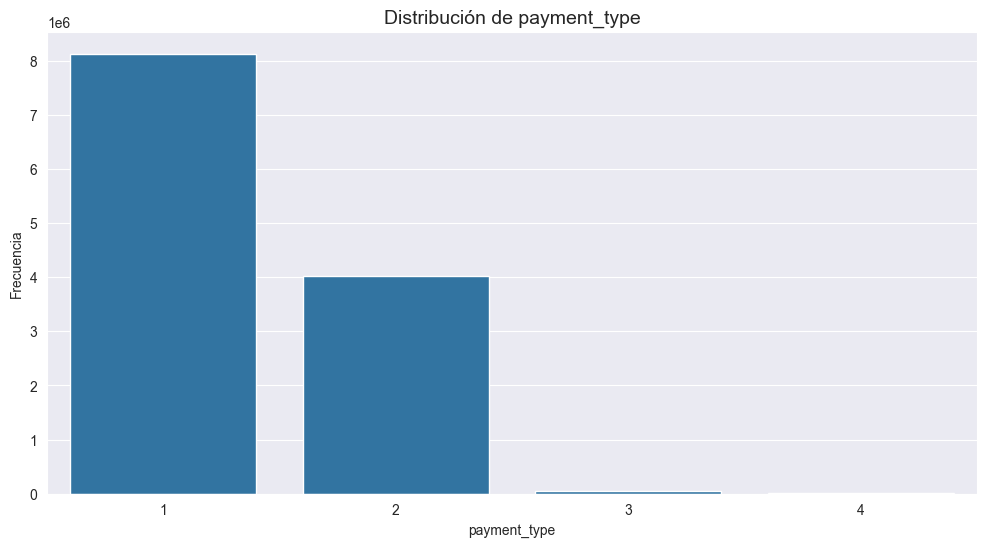

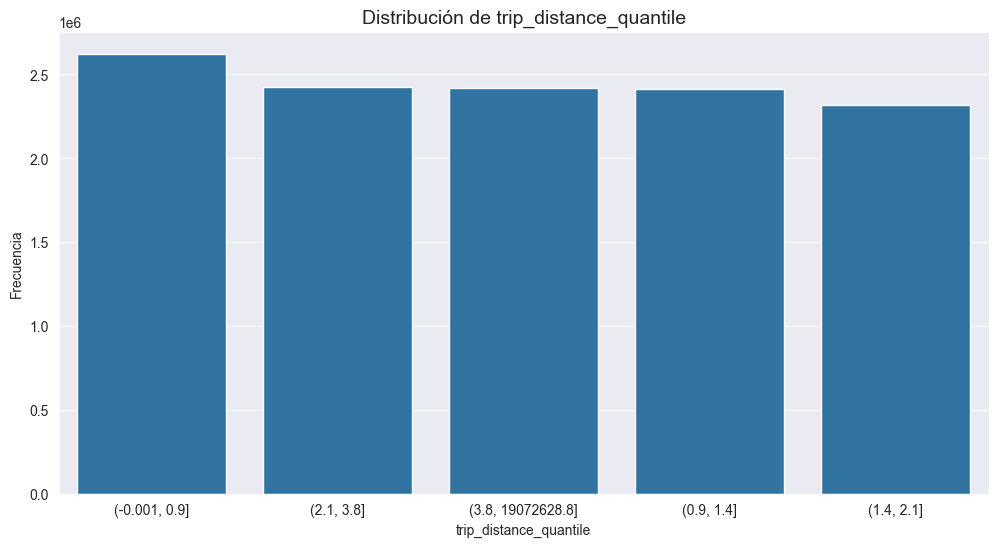

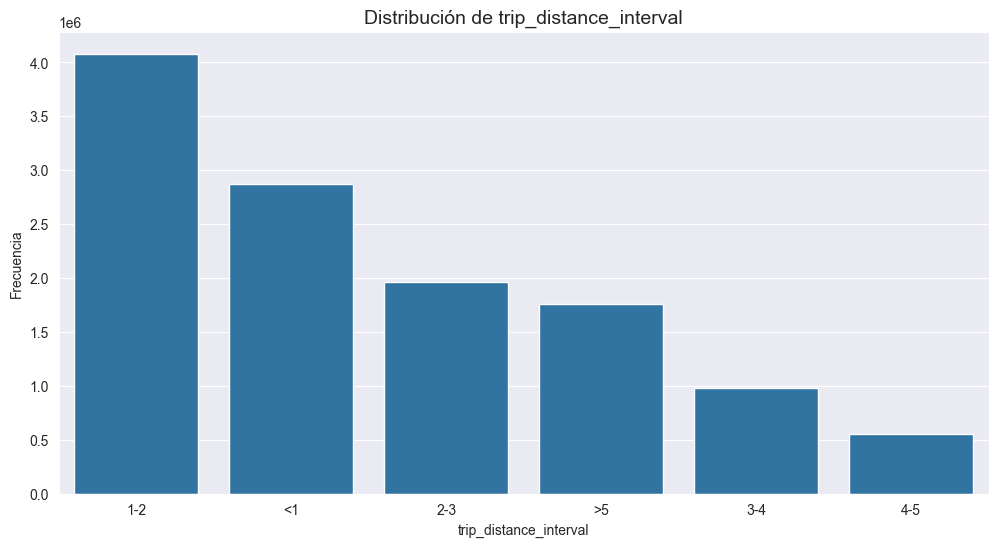

In [123]:
for var in vars_cat:
    order = data[var].value_counts().index
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=var, order=order)
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

### Paso 9.2: Análisis Univeriado de Variables Númericas

#### Paso 9.2.1: Análisis Univeriado de Variables Discretas

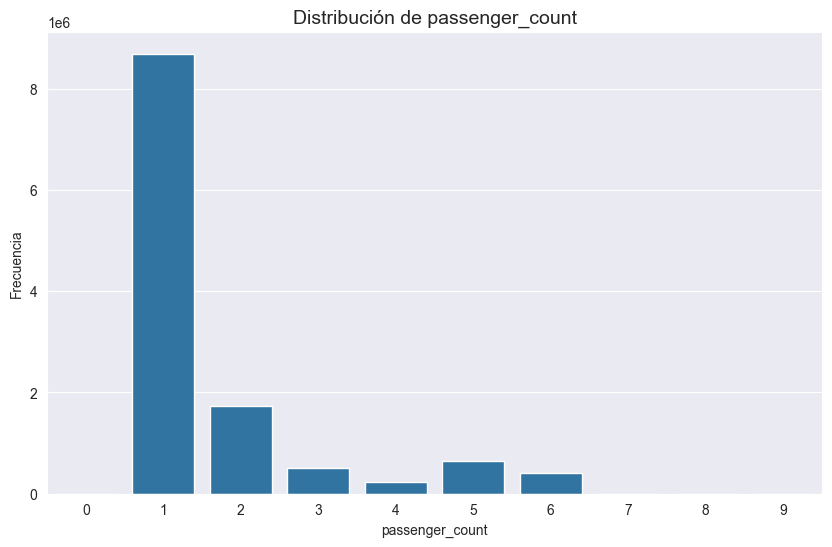

In [124]:
for var in vars_disc:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=var)
    plt.title(f'Distribución de {var}', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

#### Paso 9.2.2: Análisis Univeriado de Variables Continuas

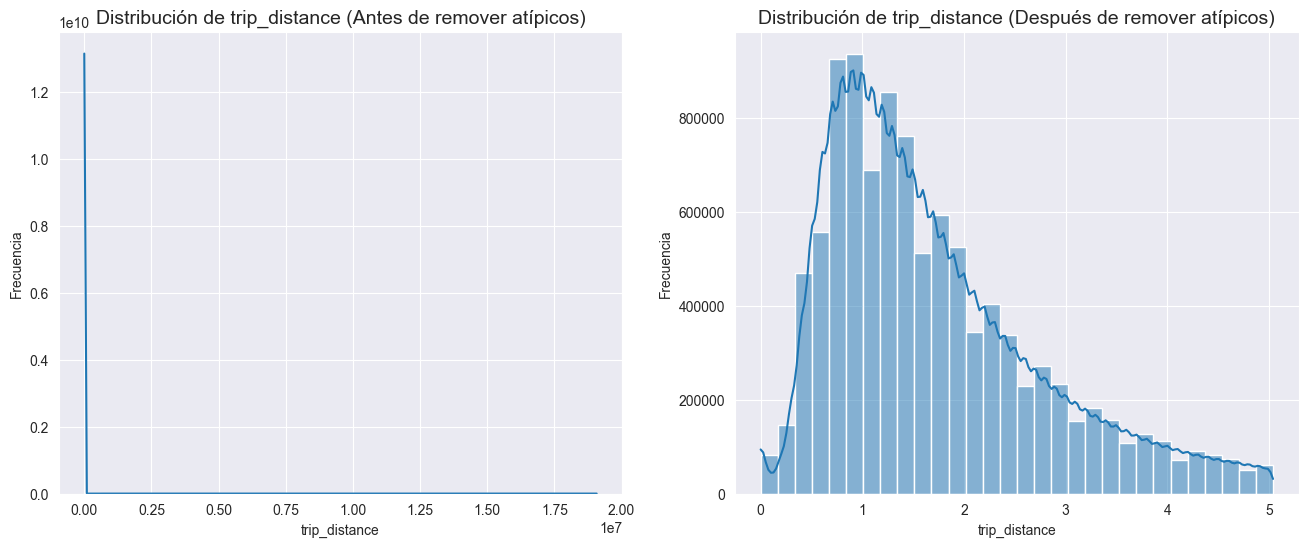

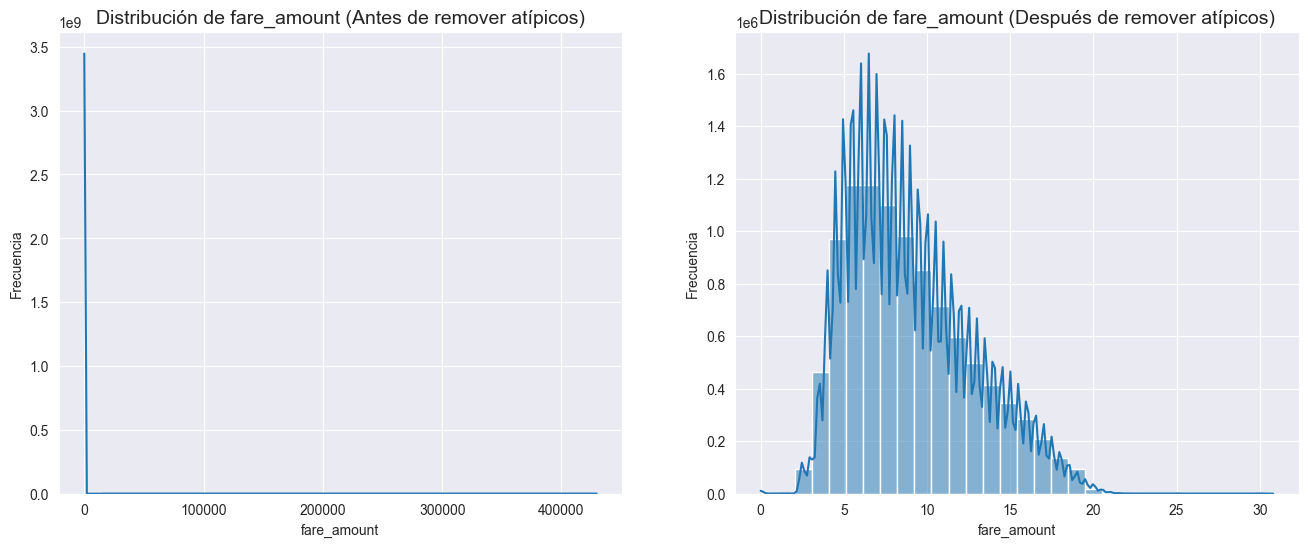

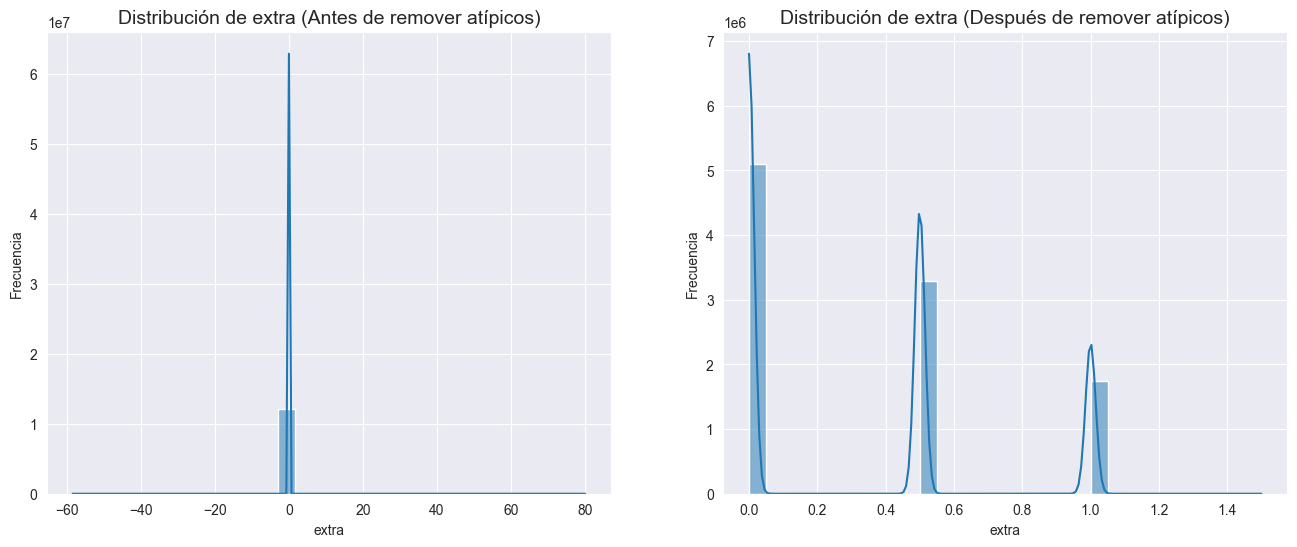

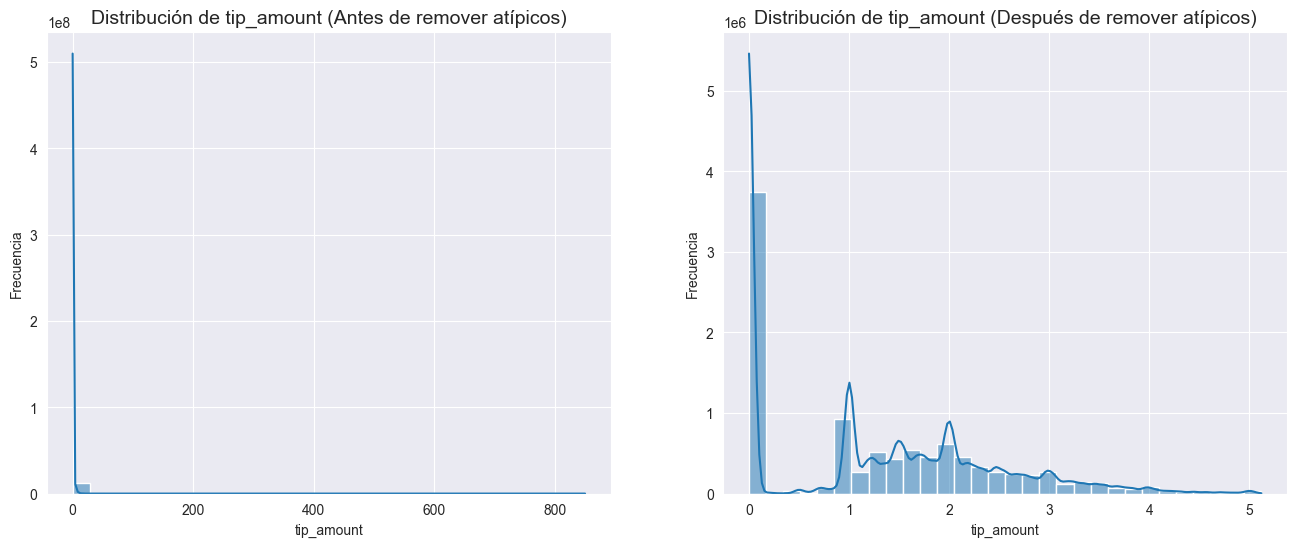

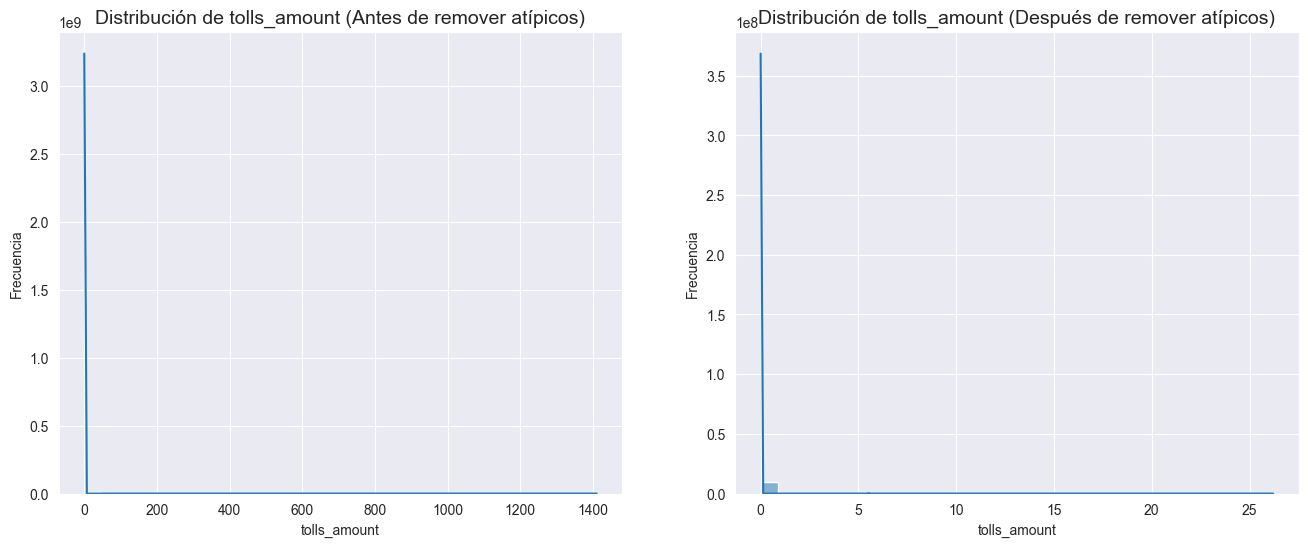

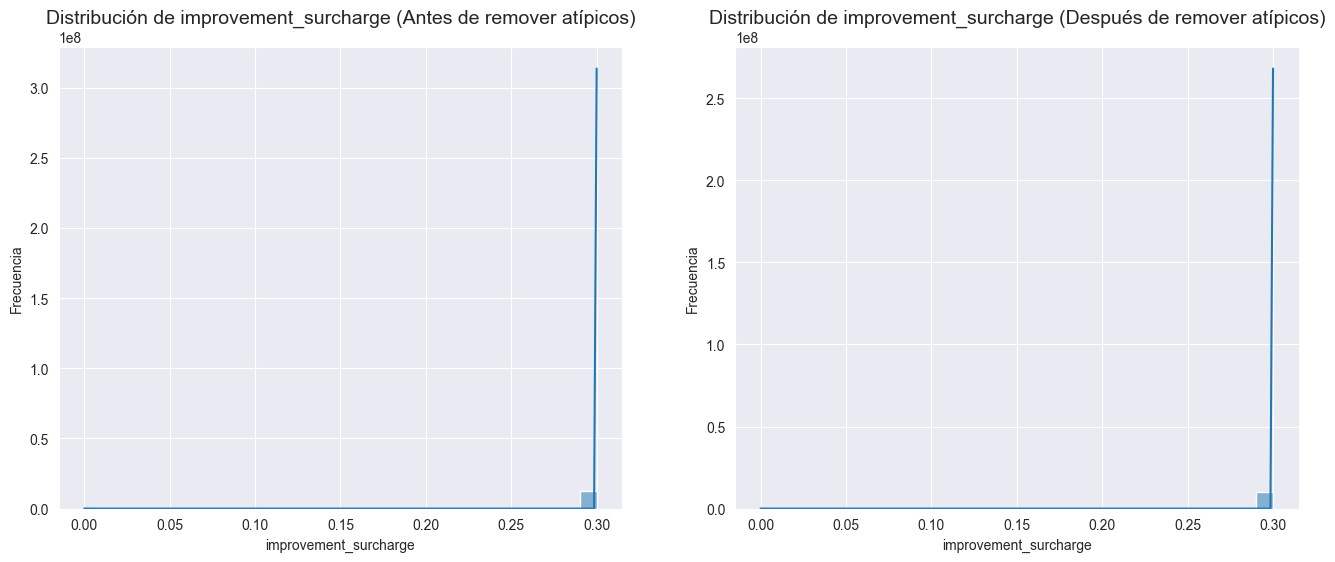

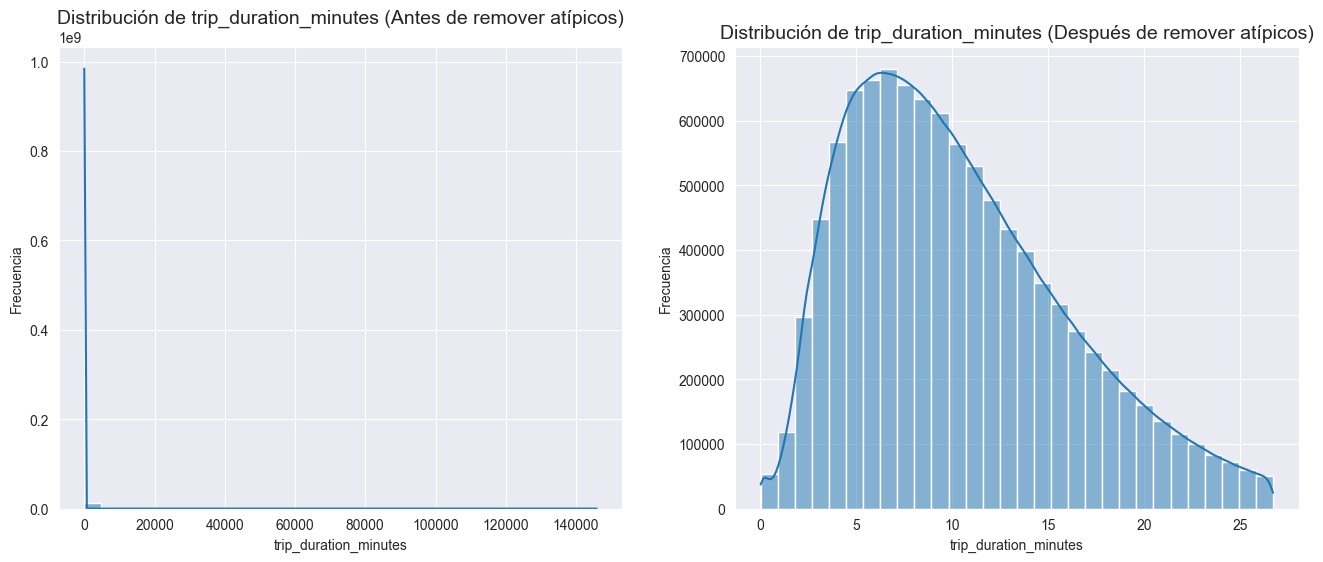

In [125]:
for var in vars_con:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribución de {var} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    plt.subplot(1, 2, 2)
    sns.histplot(data_cleaned[var], kde=True, bins=30)
    plt.title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

### Paso 9.3: Análisis Univeriado del Variable Objetivo

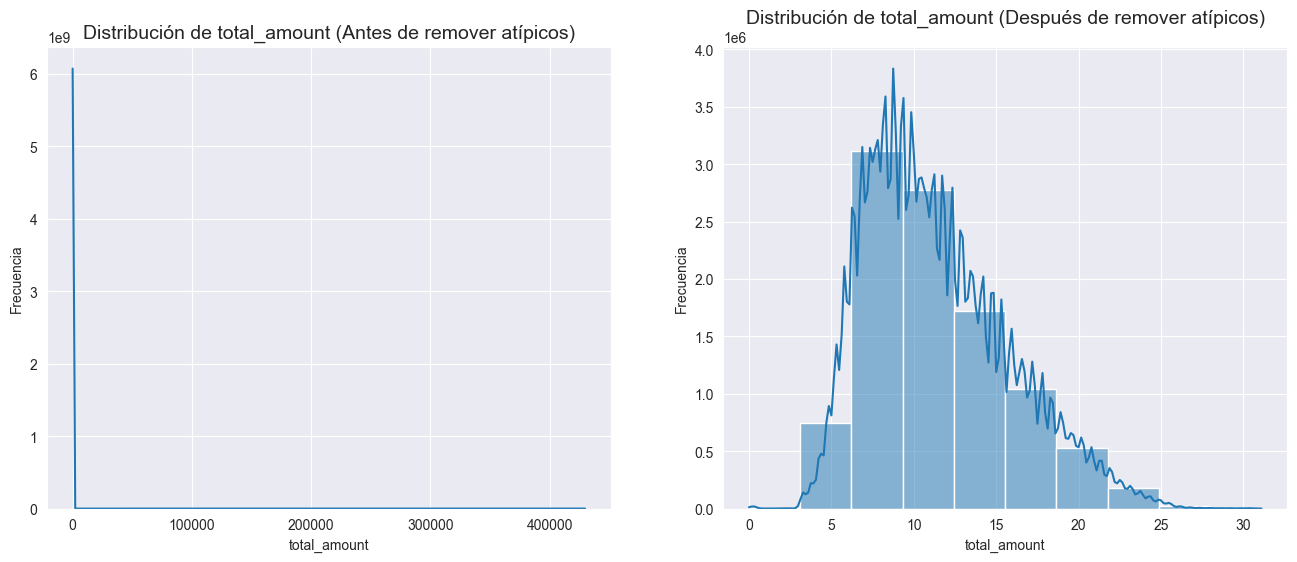

In [126]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[target_var_num], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num} (Antes de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data_cleaned[target_var_num], kde=True, bins=10)
plt.title(f'Distribución de {target_var_num} (Después de remover atípicos)', fontsize=14)
plt.xlabel(target_var_num)
plt.ylabel('Frecuencia')
plt.show()

## Paso 10: Análisis Bivariado

### Paso 10.1: Análisis Bivariado: Relación con el Precio

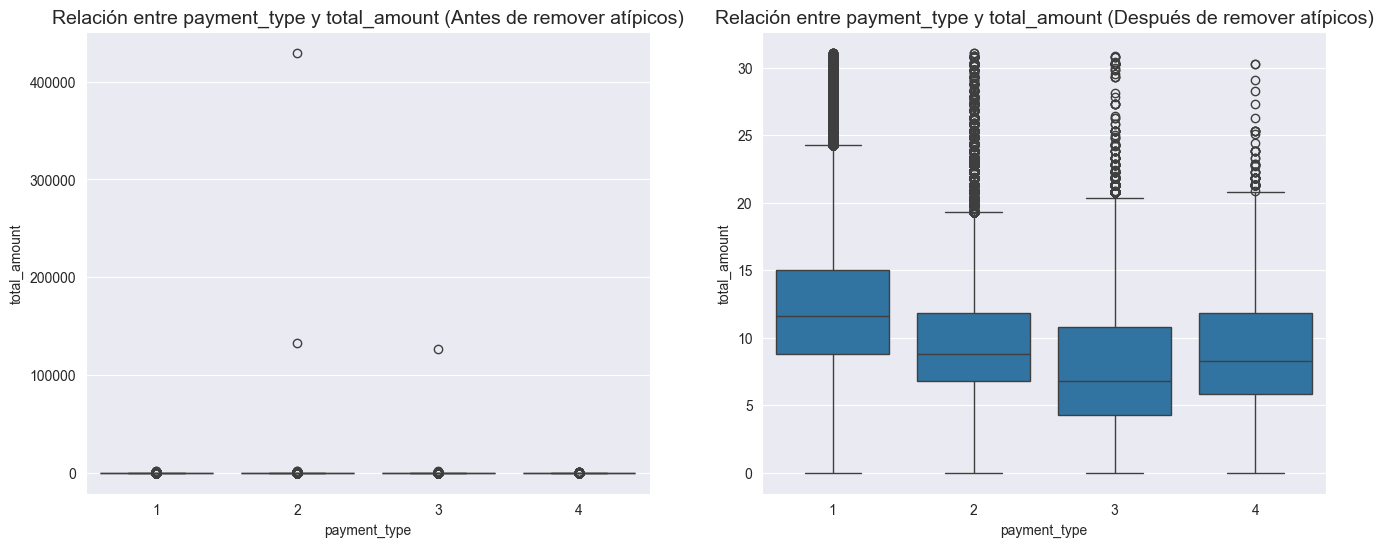

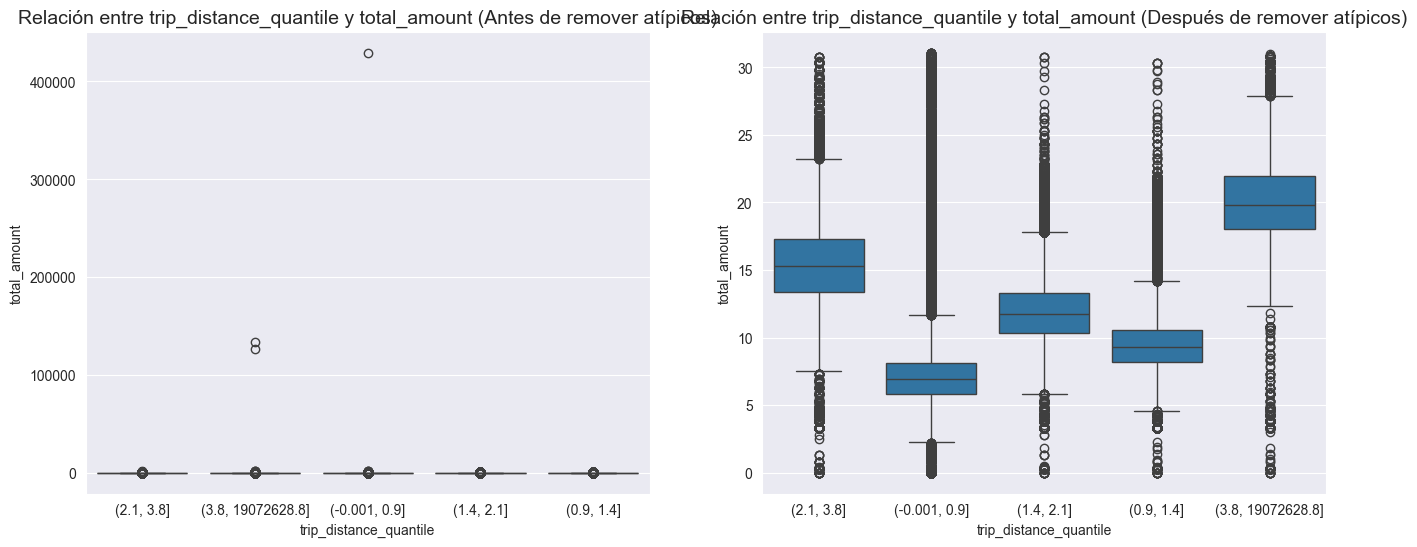

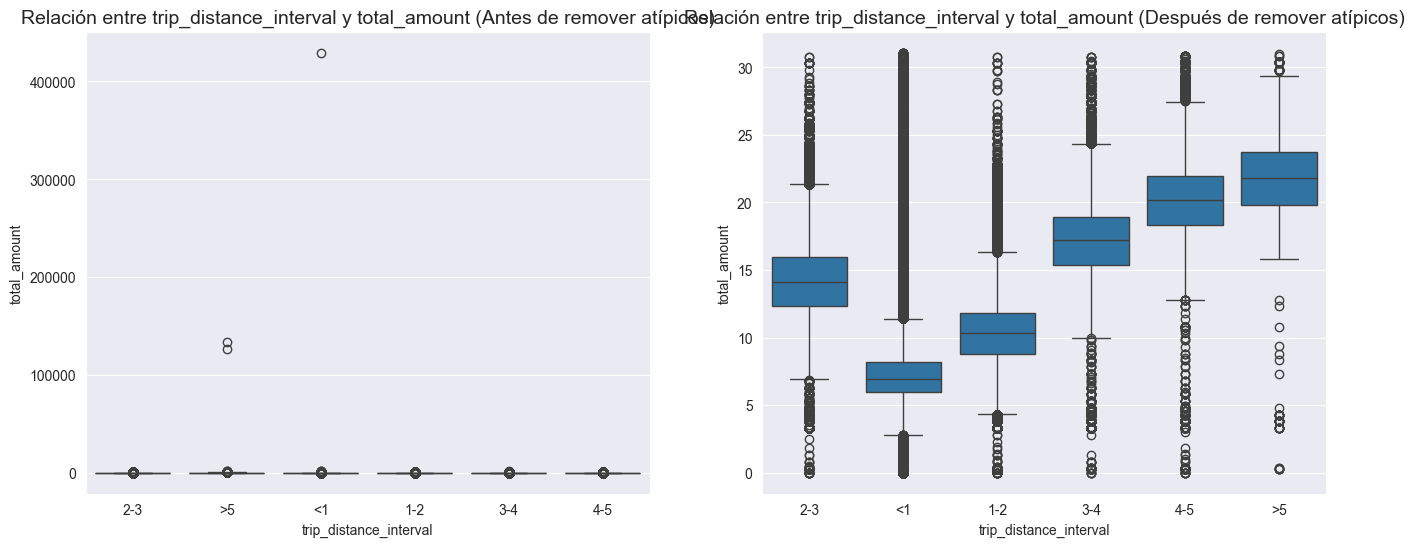

In [129]:
for col in vars_cat:
    plt.figure(figsize=(16, 6))  # Standard size for other categories
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=col, y=target_var_num)  # Horizontal plot
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num)  # Horizontal plot
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.show()

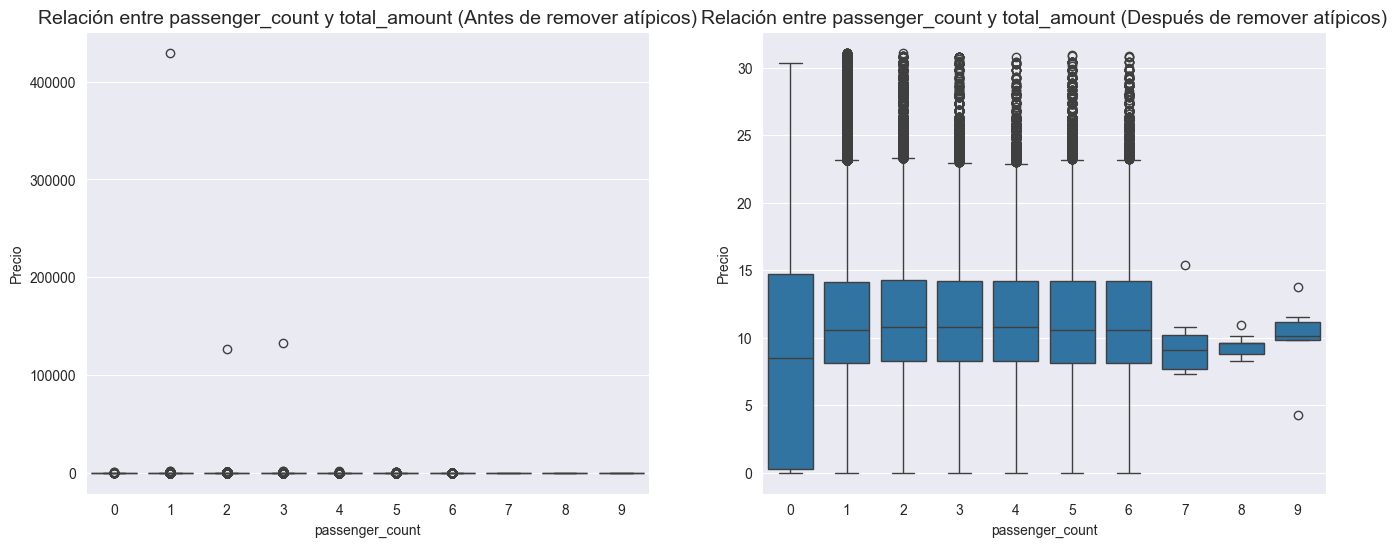

In [130]:
for col in vars_disc:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)

    plt.subplot(1, 2, 2)
    sns.boxplot(data=data_cleaned, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.show()

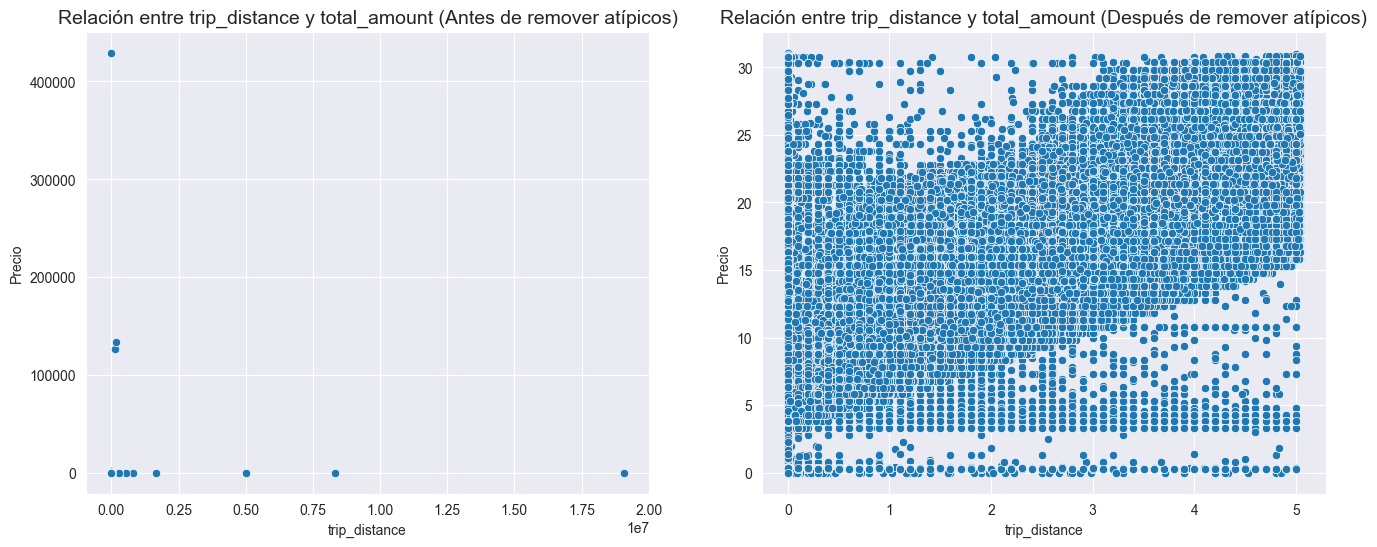

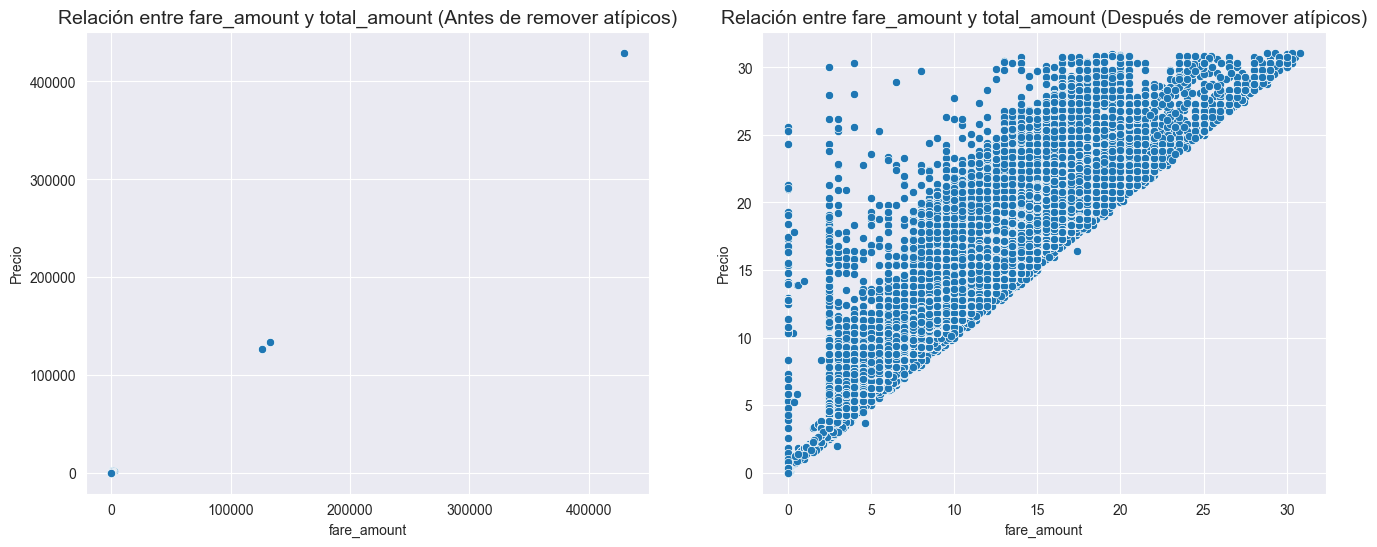

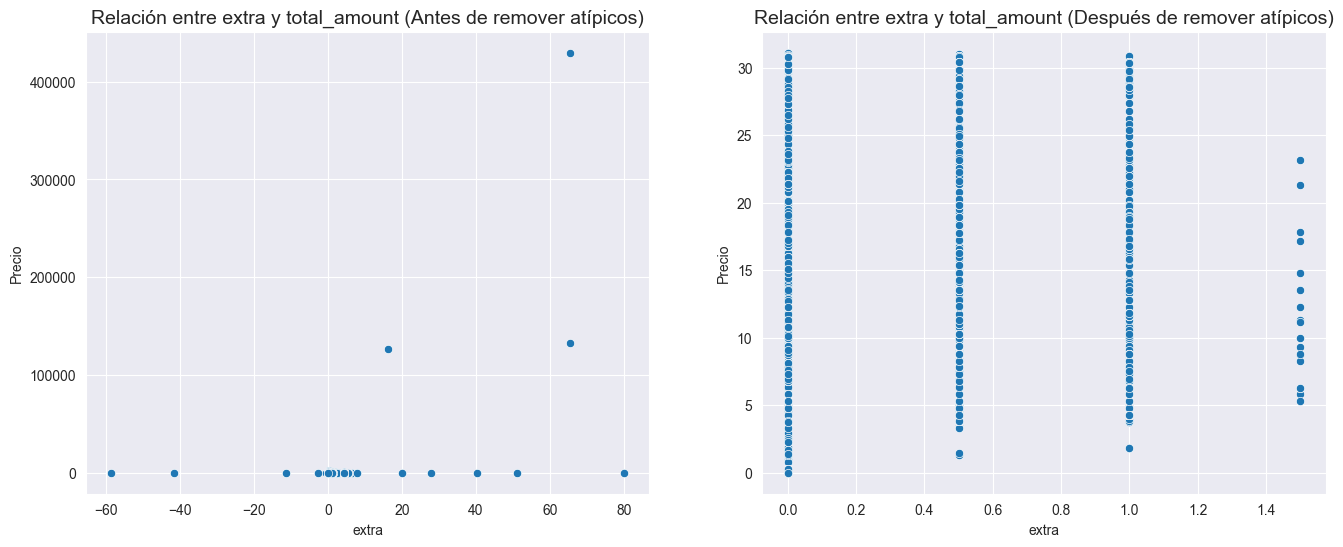

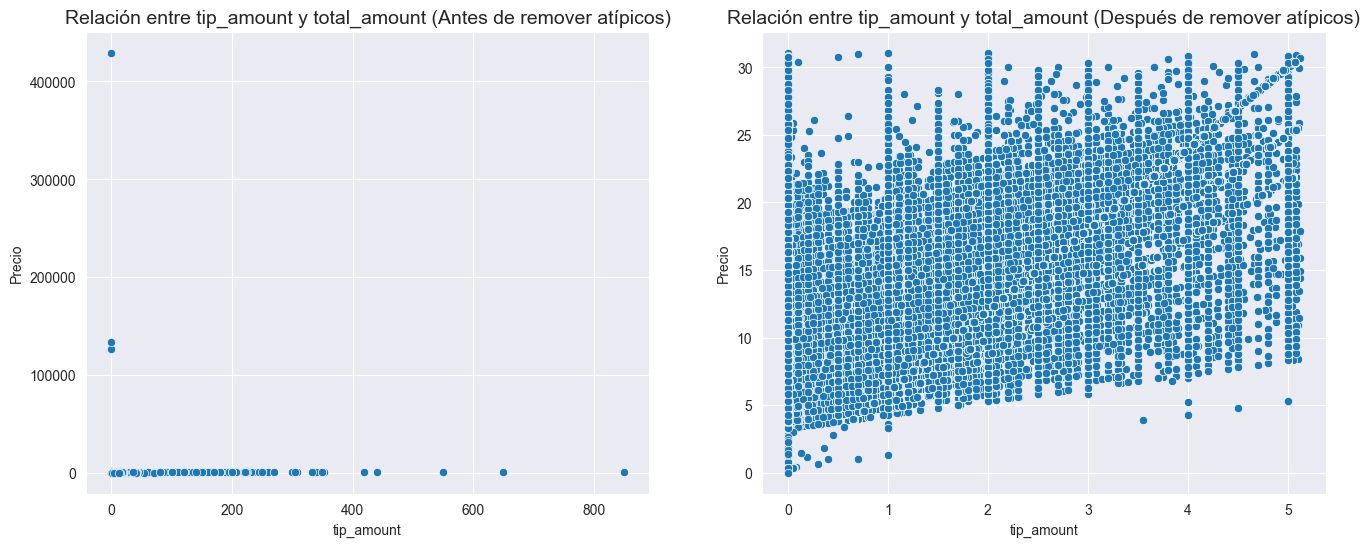

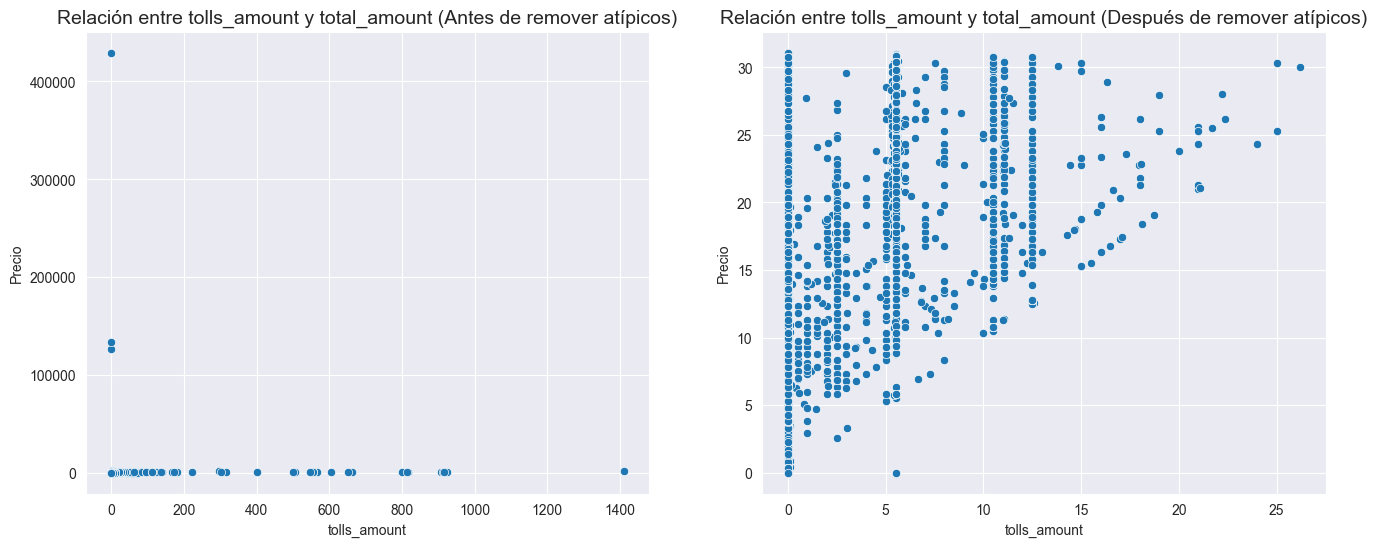

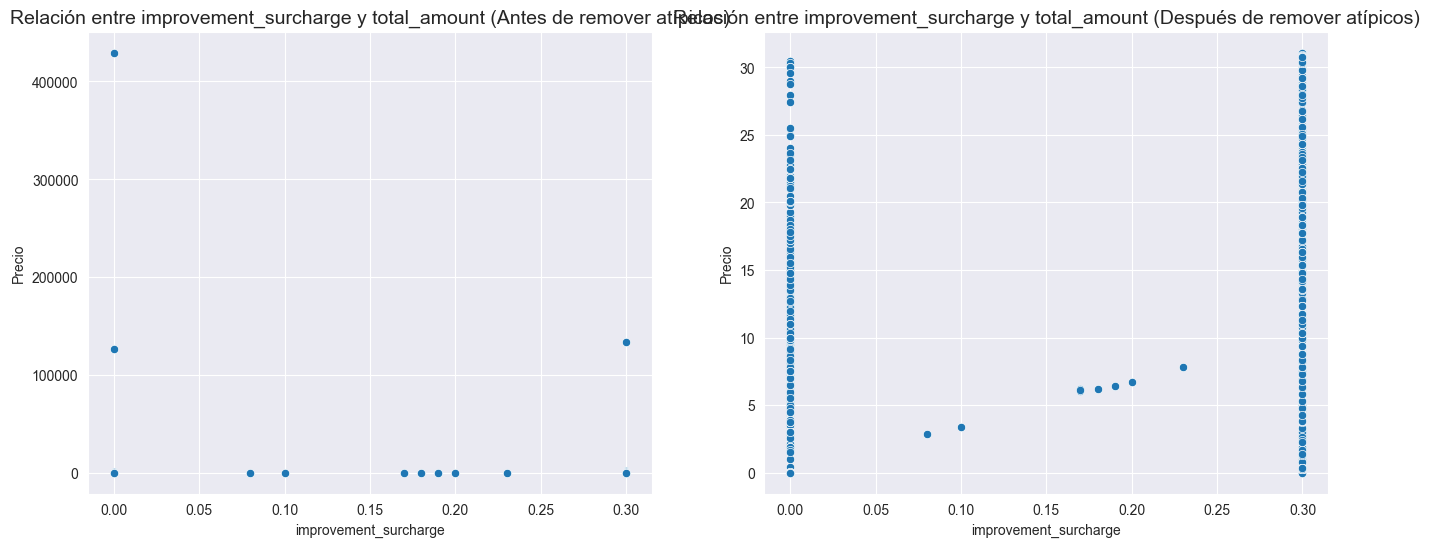

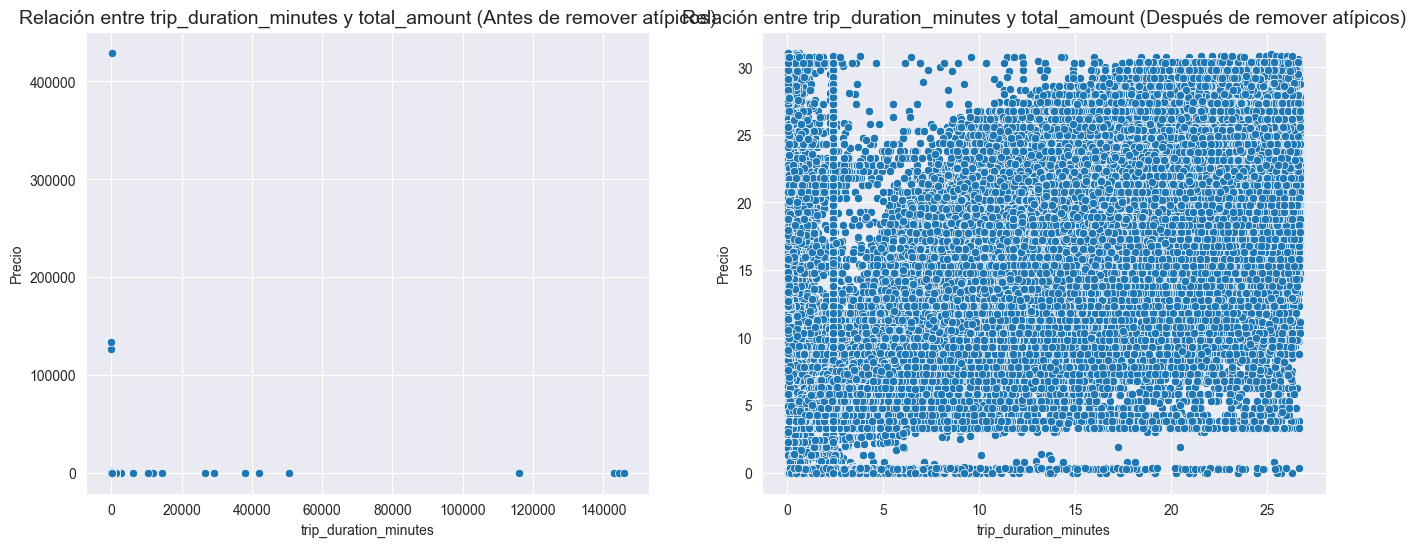

In [131]:
for col in vars_con:
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Antes de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data_cleaned, x=col, y=target_var_num)
    plt.title(f'Relación entre {col} y {target_var_num} (Después de remover atípicos)', fontsize=14)
    plt.xlabel(col)
    plt.ylabel(target_var_num)
    plt.show()

## Paso 11: Análisis multivariado

### Paso 11.1: Análisis de Correlación

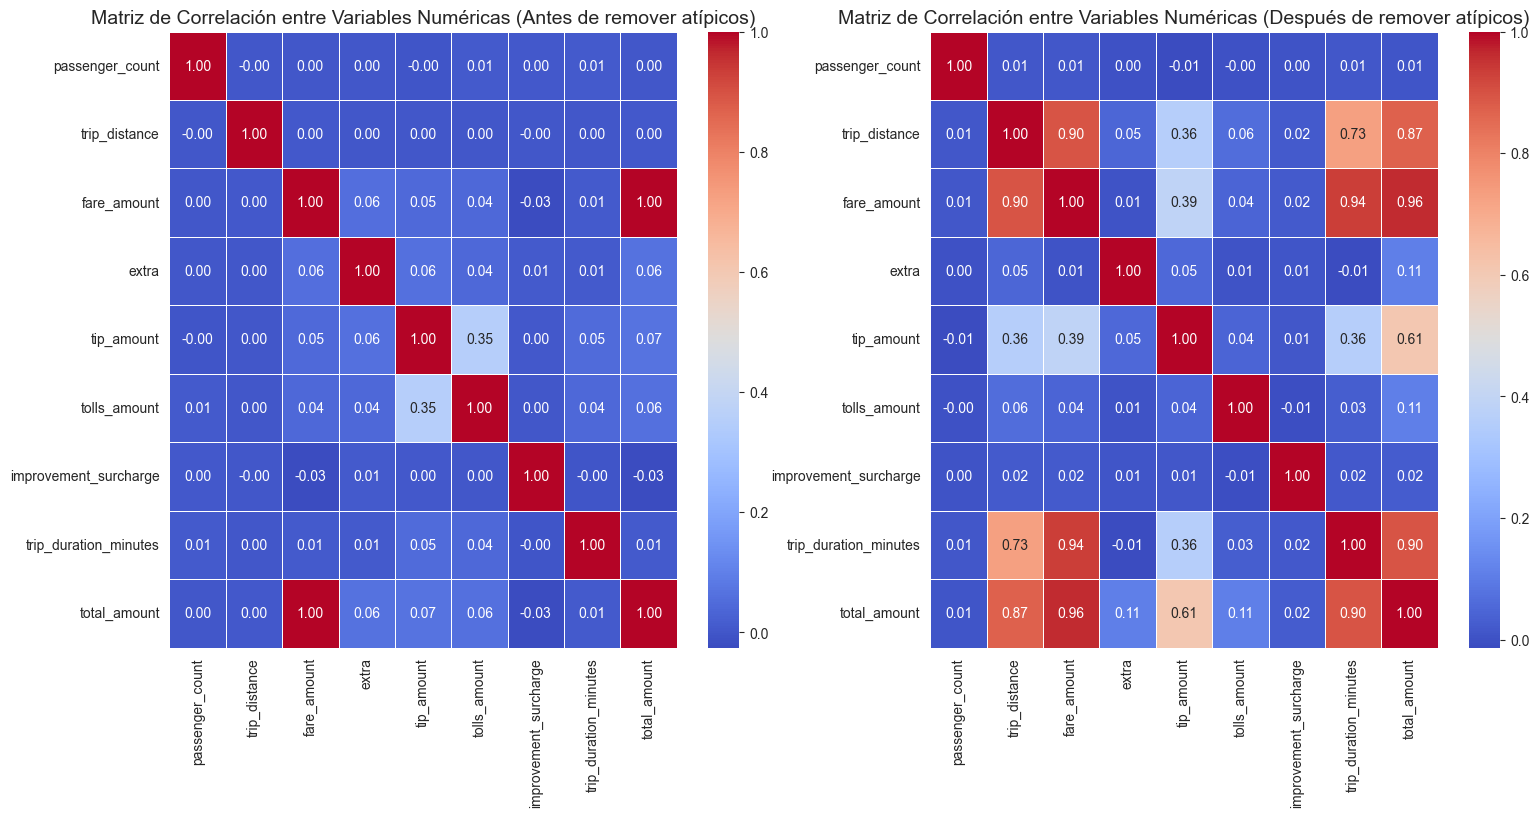

In [132]:
correlation_matrix = data[vars_nums + [target_var_num]].corr()
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Antes de remover atípicos)", fontsize=14)

correlation_matrix_cleaned = data_cleaned[vars_nums + [target_var_num]].corr()
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas (Después de remover atípicos)", fontsize=14)
plt.show()